# HW06
## Problem 1
### Yun Cheng
#### USC ID: 5013232478

1.
Supervised, Semi-Supervised, and Unsupervised Learning

a)
Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
%28Diagnostic%29
. Download the data in
https://archive.ics.uci.edu/ml/
machine-learning-databases/breast-cancer-wisconsin/wdbc.data
, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes. Use the first 20% of the positive and negative classes in the
file as the test set and the rest as the training set

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
data=pd.read_csv('./wdbc.data',header=None)
data.rename(columns={1: 'class'}, inplace=True)
data.head()

,0,class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
def SplitData(data,size_test,j):
    
    ClassM=data.loc[data['class'] == 'M']
    ClassB=data.loc[data['class'] == 'B']

    X_M = ClassM.iloc[:, 2:-1]
    Y_M = ClassM.iloc[:, 1]
    X_B = ClassB.iloc[:, 2:-1]
    Y_B = ClassB.iloc[:, 1]
#Select 20% data from each class
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, Y_M, test_size=size_test,random_state=j)
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, Y_B, test_size=size_test,random_state=j)
#concate selected data
    X_test = np.concatenate((X_test_M,X_test_B), axis=0)
    X_train= np.concatenate((X_train_M,X_train_B), axis=0)
    y_test = np.concatenate((y_test_M,y_test_B), axis=0)
    y_train = np.concatenate((y_train_M,y_train_B), axis=0)
    return X_test,X_train,y_test,y_train

b)
Monte-Carlo Simulation
: Repeat the following procedures for supervised, un-
supervised, and semi-supervised learning
M
= 30 times, and use randomly se-
lected train and test data (make sure you use 20% of both the positve and nega-
tive classes as the test set). Then compare the
average
scores (accuracy, precision,
recall,
F
1
-score, and AUC) that you obtain from each algorithm

i. Supervised Learning:
Train an
L
1
-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall,
F
1
-score, and AUC, for
both training and test sets over your
M
runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs

In [4]:
#Normalized data
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def normalize(data):
    data = MinMaxScaler().fit(data).transform(data)
    return data
#labek encoder
from sklearn.preprocessing import LabelEncoder
def labelencoder(data):
    lbl = LabelEncoder().fit(data)
    result=lbl.transform(data)
    return result
#ROC-AUC function
def auc_roc(y_true, y_score, datatype):
    FP, TP, thresholds = roc_curve(y_true, y_score)
    area = auc(FP, TP)
    plt.plot(FP, TP, color='red', label='AUC = ' + str(area))
    plt.plot([0, 1], [0, 1], linestyle='dotted')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for {}'.format(datatype))
    plt.legend()
    plt.show()

In [5]:
param_grid = {'C': np.linspace(-1,10,5)}
accu_score_train=[]
precision_train=[]
recall_train=[]
F1_train=[]
accu_score_test=[]
precision_test=[]
recall_test=[]
F1_test=[]
for j in range(30):
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_train_encode=labelencoder(y_train)

    clf=LinearSVC(penalty='l1',random_state=None,dual=False,max_iter=2000)
    GridCV = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    GridCV.fit(X_train_normal, y_train_encode)
    Opticlf=GridCV.best_estimator_
    y_train_predict = Opticlf.predict(X_train_normal)
    y_test_predict = Opticlf.predict(X_test_normal)
    #Predict confidence scores for samples.
    y_test_dfun=Opticlf.decision_function(X_test_normal)
    y_train_dfun=Opticlf.decision_function(X_train_normal)
    
    
    accu_score_train.append(accuracy_score(y_train_encode, y_train_predict))
    precision_train.append(precision_score(y_train_encode, y_train_predict))
    recall_train.append(recall_score(y_train_encode, y_train_predict,average='binary',pos_label=1))
    F1_train.append(f1_score(y_train_encode, y_train_predict))
    
    accu_score_test.append(accuracy_score(y_test_encode, y_test_predict))
    precision_test.append(precision_score(y_test_encode, y_test_predict))
    recall_test.append(recall_score(y_test_encode, y_test_predict))
    F1_test.append(f1_score(y_test_encode, y_test_predict))
    print(j," iteration is done")
    

0  iteration is done
1  iteration is done
2  iteration is done
3  iteration is done
4  iteration is done
5  iteration is done
6  iteration is done
7  iteration is done
8  iteration is done
9  iteration is done
10  iteration is done
11  iteration is done
12  iteration is done
13  iteration is done
14  iteration is done
15  iteration is done
16  iteration is done
17  iteration is done
18  iteration is done
19  iteration is done
20  iteration is done
21  iteration is done
22  iteration is done
23  iteration is done
24  iteration is done
25  iteration is done
26  iteration is done
27  iteration is done
28  iteration is done
29  iteration is done


In [6]:
#Report the average accuracy, precision, recall, F 1 -score
print('Average train accurancy is ',np.average(accu_score_train))
print('Average test accurancy is ',np.average(accu_score_test))
print('Average train precision is ',np.average(precision_train))
print('Average test precision is ',np.average(precision_test))
print('Average train recall is ',np.average(recall_train))
print('Average test recall is ',np.average(recall_test))
print('Average test F1 is ',np.average(F1_test))
print('Average train F1 is ',np.average(F1_train))

Average train accurancy is  0.9875183553597651
Average test accurancy is  0.9017391304347825
Average train precision is  0.9918052865738819
Average test precision is  0.8248299745486648
Average train recall is  0.9745562130177513
Average test recall is  0.9790697674418604
Average test F1 is  0.8886403959761484
Average train F1 is  0.9830902604333034


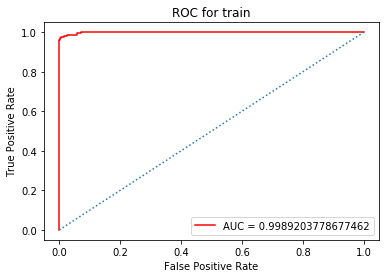

array([[284,   1],
       [  5, 164]])

In [7]:
auc_roc(y_train_encode, y_train_dfun,'train')
confusion_matrix(y_train_encode, y_train_predict)

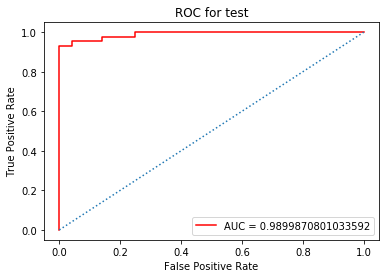

array([[63,  9],
       [ 2, 41]])

In [8]:
auc_roc(y_test_encode, y_test_dfun,'test')
confusion_matrix(y_test_encode, y_test_predict)

ii.
Semi-Supervised Learning/ Self-training:
select 50% of the positive
class along with 50% of the negative class in the training set as
labeled data
and the rest as
unlabelled data
. You can select them randomly

A.
Train an
L
1
-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation

In [9]:
X_test,X_train,y_test,y_train=SplitData(data,0.2,1)
#Split 50% train dataset as unlabel data
X_unlabel,X_label,y_true,y_label=train_test_split(X_train, y_train, test_size=0.5,random_state=1)

In [10]:
param_grid = {'C': np.linspace(-1,10,10)}
X_label_normal=normalize(X_label)
y_label_encode=labelencoder(y_label)
clf=LinearSVC(penalty='l1',random_state=None,dual=False,max_iter=2000)
GridCV = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
GridCV.fit(X_label_normal, y_label_encode)
Opticlf=GridCV.best_estimator_
print("Best C is ",GridCV.best_params_)

Best C is  {'C': 3.8888888888888893}


B.
Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. 

In [11]:
def semi_learning(X_train,y_train,X_unlabel,Opticlf):
    unlabel_size=X_unlabel.shape[0]
    while unlabel_size>0:
    # calculate distance for unlabelled data
        dist =Opticlf.decision_function(X_unlabel)
    # Find  the index of farthest point to the hyperplane
        far_index = np.where(np.abs(dist) == np.max(np.abs(dist)))
    # Farthest point fit in SVM and get labeled
        far_X = X_unlabel[far_index]
        label_y = Opticlf.predict(far_X)
    # Append the labeled point to train data
        X_train = np.append(X_train, far_X, axis=0)
        y_train = np.append(y_train, label_y)
    # Delete unlabelled data
        X_unlabel = np.delete(X_unlabel, far_index, axis=0)
        unlabel_size -= 1
    # Return such classifier
    return Opticlf

Test the final SVM on the test data and the
average accuracy, precision, recall,
F
1
-score, and AUC, for both training
and test sets over your
M
runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.

In [12]:
semi_accu_score_train=[]
semi_precision_train=[]
semi_recall_train=[]
semi_F1_train=[]
semi_accu_score_test=[]
semi_precision_test=[]
semi_recall_test=[]
semi_F1_test=[]
semi_y_test_predictlist=[]
semi_y_train_predictlist=[]
param_grid = {'C': np.linspace(-1,10,10)}
for j in range(30):
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)  
    #Normalize train and test dataset
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_train_encode=labelencoder(y_train)
    #Split 50% train dataset as unlabel data
    X_unlabel,X_label,y_true,y_label=train_test_split(X_train_normal, y_train_encode, test_size=0.5,random_state=j)
    #Normalize labeled data
    X_label_normal=normalize(X_label)
    y_label_encode=labelencoder(y_label)
    X_unlabel_normal=normalize(X_unlabel)
    #Get best parameter classifier
    clf=LinearSVC(penalty='l1',random_state=None,dual=False,max_iter=2000)
    GridCV = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    GridCV.fit(X_label_normal, y_label_encode)
    Opticlf=GridCV.best_estimator_
    
    semi_clf=semi_learning(X_train_normal,y_train_encode,X_unlabel_normal,Opticlf)
    semi_y_train_predict = semi_clf.predict(X_train_normal)
    semi_y_test_predict = semi_clf.predict(X_test_normal)
    semi_y_test_predictlist.append(semi_y_test_predict)
    semi_y_train_predictlist.append(semi_y_train_predict)
    
    #Predict confidence scores for samples.
    semi_y_test_dfun=semi_clf.decision_function(X_test_normal)
    semi_y_train_dfun=semi_clf.decision_function(X_train_normal)
    
    
    semi_accu_score_train.append(accuracy_score(y_train_encode, semi_y_train_predict))
    semi_precision_train.append(precision_score(y_train_encode, semi_y_train_predict))
    semi_recall_train.append(recall_score(y_train_encode, semi_y_train_predict))
    semi_F1_train.append(f1_score(y_train_encode, semi_y_train_predict))
    
    semi_accu_score_test.append(accuracy_score(y_test_encode, semi_y_test_predict))
    semi_precision_test.append(precision_score(y_test_encode, semi_y_test_predict))
    semi_recall_test.append(recall_score(y_test_encode, semi_y_test_predict))
    semi_F1_test.append(f1_score(y_test_encode, semi_y_test_predict))
    print(j+1," iteration is done")
    

1  iteration is done
2  iteration is done
3  iteration is done
4  iteration is done
5  iteration is done
6  iteration is done
7  iteration is done
8  iteration is done
9  iteration is done
10  iteration is done
11  iteration is done
12  iteration is done
13  iteration is done
14  iteration is done
15  iteration is done
16  iteration is done
17  iteration is done
18  iteration is done
19  iteration is done
20  iteration is done
21  iteration is done
22  iteration is done
23  iteration is done
24  iteration is done
25  iteration is done
26  iteration is done
27  iteration is done
28  iteration is done
29  iteration is done
30  iteration is done


In [13]:
print('Average train accurancy is ',np.average(semi_accu_score_train))
print('Average test accurancy is ',np.average(semi_accu_score_test))
print('Average train precision is ',np.average(semi_precision_train))
print('Average test precision is ',np.average(semi_precision_test))
print('Average train recall is ',np.average(semi_recall_train))
print('Average test recall is ',np.average(semi_recall_test))
print('Average test F1 is ',np.average(semi_F1_test))
print('Average train F1 is ',np.average(semi_F1_train))

Average train accurancy is  0.9620411160058739
Average test accurancy is  0.9394202898550723
Average train precision is  0.9843444464062957
Average test precision is  0.9170197447393574
Average train recall is  0.9140039447731755
Average test recall is  0.9395348837209302
Average test F1 is  0.9229854205860418
Average train F1 is  0.946174829272377


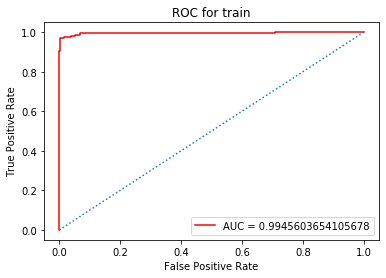

array([[285,   0],
       [ 16, 153]])

In [14]:
#report 4th iteration results:
auc_roc(y_train_encode, semi_y_train_dfun,'train')
confusion_matrix(y_train_encode, semi_y_train_predict)

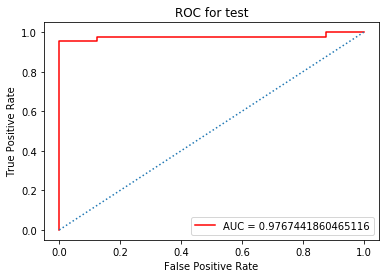

array([[70,  2],
       [ 2, 41]])

In [15]:
auc_roc(y_test_encode, semi_y_test_dfun,'test')
confusion_matrix(y_test_encode, semi_y_test_predict)

ii.
Unsupervised Learning:
Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume
k
= 2

A.Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?

In [46]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.special import softmax
k_accu_score_train=[]
k_precision_train=[]
k_recall_train=[]
k_F1_train=[]
k_accu_score_test=[]
k_precision_test=[]
k_recall_test=[]
k_F1_test=[]
k_y_test_predictlist=[]
k_y_train_predictlist=[]
y_train_encodelist=[]
y_test_encodelist=[]
for j in range(30):
    
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_test_encodelist.append(y_test_encode)
    y_train_encode=labelencoder(y_train)
    y_train_encodelist.append(y_train_encodelist)
    
    k_clf = KMeans(n_clusters=2, init='random',n_init = 100)
    k_y_train_predict = k_clf.fit_predict(X_train_normal)
    k_y_train_predictlist.append(k_y_train_predict)
    
    train_dist=cdist(X_train_normal, k_clf.cluster_centers_,'euclidean')
    # use distance from cluster 1 to pass through softmax
    k_y_train_dfun=softmax(train_dist[:,1])
    
    
    k_accu_score_train.append(accuracy_score(y_train_encode, k_y_train_predict))
    k_precision_train.append(precision_score(y_train_encode, k_y_train_predict))
    k_recall_train.append(recall_score(y_train_encode, k_y_train_predict))
    k_F1_train.append(f1_score(y_train_encode, k_y_train_predict))
    
  
    

In [47]:
print('Average train accurancy is ',np.average(k_accu_score_train))

print('Average train precision is ',np.average(k_precision_train))

print('Average train recall is ',np.average(k_recall_train))

print('Average train F1 is ',np.average(k_F1_train))

Average train accurancy is  0.3837004405286344
Average train precision is  0.40384387324639326
Average train recall is  0.4
Average train F1 is  0.3945270851729278


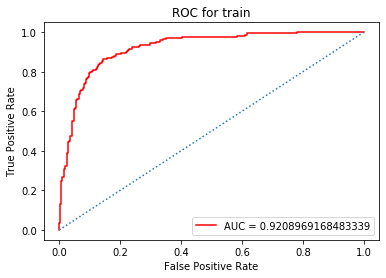

array([[  6, 279],
       [141,  28]])

In [48]:
#report 4th iteration results:
auc_roc(y_train_encode, k_y_train_dfun,'train')
confusion_matrix(y_train_encode, k_y_train_predict)

To avoid K-means getting stuck at a bad local optima,we can use multiple randon initialization and increaseing the number of time the k-means algorithm that will be run with different centroid seeds.

B.Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall,
F
1
-score, and AUC over
M
runs, and **ROC and the confusion matrix for one of the runs**.

In [19]:
from collections import Counter   
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

In [20]:
from scipy.spatial.distance import cdist
#dm = cdist(df, centroids)
k_accu_score_train_majority=[]
k_precision_train_majority=[]
k_recall_train_majority=[]
k_F1_train_majority=[]
for j in range(30):
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_train_encode=labelencoder(y_train)
   
    
    k_clf_majority = KMeans(n_clusters=2, init='random',n_init = 100)
    k_y_train_predict = k_clf_majority.fit_predict(X_train_normal)

    index_0=np.argsort(cdist(X_train_normal, k_clf_majority.cluster_centers_,'euclidean')[:,0])[:30]
    index_1=np.argsort(cdist(X_train_normal, k_clf_majority.cluster_centers_,'euclidean')[:,1])[:30]

    y_train_30_0 = y_train_encode[index_0]
    y_train_30_1 = y_train_encode[index_1]

    zero_label = most_frequent(y_train_30_0)#Majority label of "0" class
    one_label = most_frequent(y_train_30_1)#Majority label of "1" class
    k_y_train_predict_majority=np.where(k_y_train_predict==0, zero_label, one_label)

    k_accu_score_train_majority.append(accuracy_score(y_train_encode, k_y_train_predict_majority))
    k_precision_train_majority.append(precision_score(y_train_encode, k_y_train_predict_majority))
    k_recall_train_majority.append(recall_score(y_train_encode, k_y_train_predict_majority))
    k_F1_train_majority.append(f1_score(y_train_encode, k_y_train_predict_majority))

In [21]:
print('Average train accurancy is ',np.average(k_accu_score_train_majority))
print('Average train recall is ',np.average(k_recall_train_majority))
print('Average train precision is ',np.average(k_precision_train_majority))
print('Average train F1 is ',np.average(k_F1_train_majority))

Average train accurancy is  0.9295154185022025
Average train recall is  0.8483234714003945
Average train precision is  0.9576623364865343
Average train F1 is  0.8995360719142426


In [22]:
#Use last iteration to performe confidence scores for samples.
test_dist_majority=cdist(X_test_normal, k_clf_majority.cluster_centers_,'euclidean')
train_dist_majority=cdist(X_train_normal, k_clf_majority.cluster_centers_,'euclidean')
k_y_test_dfun_majority=softmax(test_dist_majority[:,1])# use distance from cluster 0 to pass through softmax
k_y_train_dfun_majority=softmax(train_dist_majority[:,1])

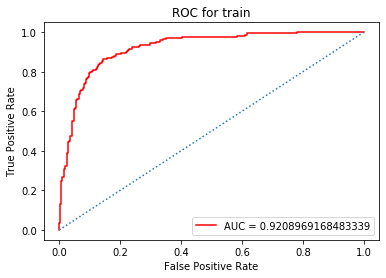

array([[279,   6],
       [ 28, 141]])

In [23]:
auc_roc(y_train_encode, k_y_train_dfun_majority,'train')
confusion_matrix(y_train_encode, k_y_train_predict_majority)

C.
Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall,
F
1
-score, and AUC over
M
runs, and ROC and the confusion matrix for one of the runs for the
test data

In [24]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
#dm = cdist(df, centroids)
k_accu_score_test_prox=[]
k_precision_test_prox=[]
k_recall_test_prox=[]
k_F1_test_prox=[]
for j in range(30):
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_train_encode=labelencoder(y_train)
    
    k_clf_prox = KMeans(n_clusters=2, init='random')
    k_y_test_predict_prox = k_clf_prox.fit(X_test_normal).predict(X_test_normal)
    

    dist_0=cdist(X_test_normal, k_clf_prox.cluster_centers_,'euclidean')[:,0]#distance to "0" class center
    dist_1=cdist(X_test_normal, k_clf_prox.cluster_centers_,'euclidean')[:,1]#distance to "1" class center
    #Modify y_test based on proximity to center
    #If a point has [dist to 0] > [dist to 1], clarify as class 1
    for i in range(len(k_y_test_predict_prox)):
        if dist_0[i]<dist_1[i]:
            k_y_test_predict_prox[i]==0
        else:
            k_y_test_predict_prox[i]==1
    
    test_dist_proxy=cdist(X_test_normal, k_clf_prox.cluster_centers_,'euclidean')[:,1]
    
    k_accu_score_test_prox.append(accuracy_score(y_test_encode, k_y_test_predict_prox))
    k_precision_test_prox.append(precision_score(y_test_encode, k_y_test_predict_prox))
    k_recall_test_prox.append(recall_score(y_test_encode, k_y_test_predict_prox))
    k_F1_test_prox.append(f1_score(y_test_encode, k_y_test_predict_prox))
    
    k_accuracy = len(y_test_encode[y_test_encode==k_y_test_predict_prox])/len(y_test_encode)

In [25]:
print('Average test accurancy is ',np.average(k_accu_score_test_prox))
print('Average test recall is ',np.average(k_recall_test_prox))
print('Average test precision is ',np.average(k_precision_test_prox))
print('Average test F-1 score is ',np.average(k_F1_test_prox))

Average test accurancy is  0.6142028985507246
Average test recall is  0.6007751937984496
Average test precision is  0.6391327710719265
Average test F-1 score is  0.6120351713740646


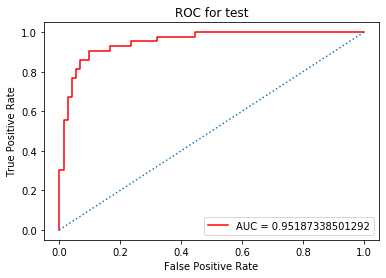

In [26]:
auc_roc(y_test_encode,  test_dist_proxy,'test')

In [27]:
confusion_matrix(y_test_encode, k_y_test_predict_prox)

array([[ 0, 72],
       [37,  6]])

### iv. Spectral Clustering
Repeat 1(b)iii using
spectral clustering
, which is clus-
tering based on kernels.
3
Research what spectral clustering is. Use RBF
kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has
p
and the
negative class has
n
samples, the two clusters must have
p
and
n
members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use
fit
−
predict
method.

Definition: Similar to K-Medoids, Spectral Clustering only requires the similarity matrix between the data, rather than requiring the data to be a vector in n-dimensional Euclidean space like K-means.**

A.
Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly

In [28]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    # Sensitivity, hit rate, recall, or true positive rate
    if TP>0:
        TPR = TP/(TP+FN)
    else:
        TPR=0
    # Fall out or false positive rate
    if FP>0:
        FPR = FP/(FP+TN)
    else:
        FPR=0
    return TPR,FPR

In [29]:
def Majority_ROC(Spec_y_train_predict,y_train_encode):
    TPRlist=[]
    FPRlist=[]
    percent=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    for i in percent:
    #Assume clustering label 1 is in cluster A
        clusterA_index=np.where(Spec_y_train_predict==1)
    #True label among cluster A
        clusterA_truelabel=y_train_encode[clusterA_index]
    #number of True postive 1 label in cluster A
        length_1_label_A=len(np.where(clusterA_truelabel==1)[0])
    #Threshold
        thresholdA=len(clusterA_index[0])*i # i% of cluster A
    #Define new predict array
        Spec_y_train_predict_new=np.zeros(Spec_y_train_predict.shape)
    # If number of postive label > than i% total number of label in cluster A
        if length_1_label_A > thresholdA: 
        # Predict it all the data in cluster A as postive 1
            Spec_y_train_predict_new[clusterA_index]=1
    # If number of postive label > than i% total number of label in cluster A
    #Predict it all the data in cluster A as negative 0
        if length_1_label_A < thresholdA:
            Spec_y_train_predict_new[clusterA_index]=0

        clusterB_index=np.where(Spec_y_train_predict==0)
        clusterB_truelabel=y_train_encode[clusterB_index]#True label among cluster B
        length_1_label_B=len(np.where(clusterB_truelabel==1)[0])# number of postive 1 label in cluster B
        thresholdB=len(clusterB_index[0])*i # i% of cluster A
        if length_1_label_B > thresholdB: # If number of postive label > than I% total number label of cluster B
            Spec_y_train_predict_new[clusterB_index]=1
        if length_1_label_B < thresholdB:
            Spec_y_train_predict_new[clusterB_index]=0
        TPR,FPR=perf_measure(y_train_encode, Spec_y_train_predict_new)
        TPRlist.append(TPR)
        FPRlist.append(FPR)
    area = auc(FPRlist, TPRlist)
    plt.plot(FPRlist,TPRlist,label='AUC = ' + str(area))
    plt.title('ROC curve by Varing threshold')
    plt.xlabel('False Postive')
    plt.ylabel('True Postive')
    
    plt.legend()
    return plt.show()

In [30]:
from scipy.spatial.distance import cdist
from sklearn.cluster import SpectralClustering
from scipy.special import softmax
Spec_accu_score_train=[]
Spec_precision_train=[]
Spec_recall_train=[]
Spec_F1_train=[]
Spec_accu_score_test=[]
Spec_precision_test=[]
Spec_recall_test=[]
Spec_F1_test=[]
for j in range(30):
    
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_train_encode=labelencoder(y_train)
    
    
    clustering = SpectralClustering(n_clusters=2,affinity='rbf',gamma=1)
    Spec_y_train_predict = clustering.fit_predict(X_train_normal)
   
    Spec_accu_score_train.append(accuracy_score(y_train_encode, Spec_y_train_predict))
    Spec_precision_train.append(precision_score(y_train_encode, Spec_y_train_predict))
    Spec_recall_train.append(recall_score(y_train_encode, Spec_y_train_predict))
    Spec_F1_train.append(f1_score(y_train_encode, Spec_y_train_predict))
    

In [31]:
print('Average train accurancy is ',np.average(Spec_accu_score_train))
print('Average train recall is ',np.average(Spec_recall_train))
print('Average train precision is ',np.average(Spec_precision_train))
print('Average train F1 is ',np.average(Spec_F1_train))

Average train accurancy is  0.642511013215859
Average train recall is  0.54930966469428
Average train precision is  0.7432264229923959
Average train F1 is  0.6079170778564399


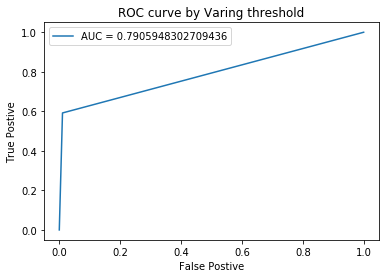

array([[282,   3],
       [ 69, 100]])

In [32]:
Majority_ROC(Spec_y_train_predict,y_train_encode)
confusion_matrix(y_train_encode,  Spec_y_train_predict)

B.Read labels of the **entire points in each cluster**  and
take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall,
F
1
-score, and AUC over
M
runs, and **ROC and the confusion matrix for one of the runs**.

In [33]:
from scipy.spatial.distance import cdist
from sklearn.cluster import SpectralClustering
from scipy.special import softmax
Spec_accu_score_train_majority=[]
Spec_precision_train_majority=[]
Spec_recall_train_majority=[]
Spec_F1_train_majority=[]
for j in range(30):
    
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_train_encode=labelencoder(y_train)
    
    
    clustering = SpectralClustering(n_clusters=2,affinity='rbf',gamma=1,n_jobs=-1)
    Spec_y_train_predict = clustering.fit_predict(X_train_normal)
    
    index_0 = np.where(Spec_y_train_predict==0)
    index_1 = np.where(Spec_y_train_predict==1)
    y_train_0 = y_train_encode[index_0]
    y_train_1 = y_train_encode[index_1]
    Zero_label = most_frequent(y_train_0)#Majority label of "0" class
    One_label = most_frequent(y_train_1)#Majority label of "1" class
    Spec_y_train_predict_majority=np.where(Spec_y_train_predict==0, Zero_label, One_label)
   
    Spec_accu_score_train_majority.append(accuracy_score(y_train_encode, Spec_y_train_predict_majority))
    Spec_precision_train_majority.append(precision_score(y_train_encode, Spec_y_train_predict_majority))
    Spec_recall_train_majority.append(recall_score(y_train_encode, Spec_y_train_predict_majority))
    Spec_F1_train_majority.append(f1_score(y_train_encode, Spec_y_train_predict_majority))
    

In [34]:
print('Average train accurancy is ',np.average(Spec_accu_score_train_majority))
print('Average train recall is ',np.average(Spec_recall_train_majority))
print('Average train precision is ',np.average(Spec_precision_train_majority))
print('Average train F1 is ',np.average(Spec_F1_train_majority))

Average train accurancy is  0.8580763582966224
Average train recall is  0.6287968441814594
Average train precision is  0.9845590512688696
Average train F1 is  0.766303719453466


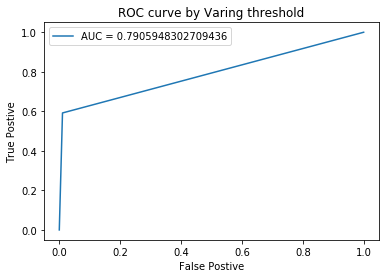

array([[282,   3],
       [ 69, 100]])

In [35]:
Majority_ROC(Spec_y_train_predict_majority,y_train_encode)
confusion_matrix(y_train_encode, Spec_y_train_predict_majority)

C. Classify test data. **Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use
fit
−
predict**
method. Report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data

In [36]:
from scipy.spatial.distance import cdist
from sklearn.cluster import SpectralClustering
from scipy.special import softmax
Spec_accu_score_test=[]
Spec_precision_test=[]
Spec_recall_test=[]
Spec_F1_test=[]
for j in range(30):
    
    X_test,X_train,y_test,y_train=SplitData(data,0.2,j)
    X_test_normal=normalize(X_test)
    X_train_normal=normalize(X_train)
    y_test_encode=labelencoder(y_test)
    y_train_encode=labelencoder(y_train)
  
    
    clustering = SpectralClustering(n_clusters=2,affinity='rbf',gamma=1)
    Spec_y_test_predict = clustering.fit_predict(X_test_normal)
    
    
   
    Spec_accu_score_test.append(accuracy_score(y_test_encode,  Spec_y_test_predict))
    Spec_precision_test.append(precision_score(y_test_encode,  Spec_y_test_predict))
    Spec_recall_test.append(recall_score(y_test_encode,  Spec_y_test_predict))
    Spec_F1_test.append(f1_score(y_test_encode,  Spec_y_test_predict))
    

In [37]:
print('Average test accurancy is ',np.average(Spec_accu_score_test))
print('Average test recall is ',np.average(Spec_recall_test))
print('Average test precision is ',np.average(Spec_precision_test))
print('Average test F1 is ',np.average(Spec_F1_test))

Average test accurancy is  0.6698550724637681
Average test recall is  0.513953488372093
Average test precision is  0.8052306478304428
Average test F1 is  0.5829800815671698


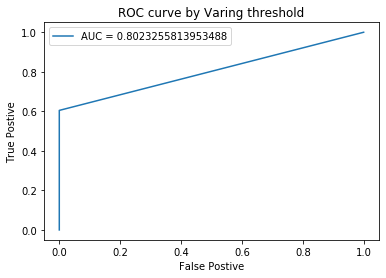

array([[ 0, 72],
       [26, 17]])

In [38]:
Majority_ROC(Spec_y_test_predict,y_test_encode)
confusion_matrix(y_test_encode, Spec_y_test_predict)

v.
One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods

In [39]:
Summary=pd.DataFrame()
Summary.reset_index(drop=True)
Summary['Learning type/Dataset']=['supervised/Train','supervised/Test',\
                                  'semi-supervised/Train','semi-supervised/Test',\
                                  'unsupervised/Train/Kmean','unsupervised/Test/Kmean',\
                                 'unsupervised/Train/Spectrual','unsupervised/Test/Spectrual']

In [40]:
Summary['Average Accurancy']=[np.average(accu_score_train),np.average(accu_score_test),\
                              np.average(semi_accu_score_train),np.average(semi_accu_score_test),\
                             np.average(k_accu_score_train_majority),np.average(k_accu_score_test_prox),\
                             np.average(Spec_accu_score_train_majority),np.average(Spec_accu_score_test)]

In [41]:
Summary['Average Recall']=[np.average(recall_train),np.average(recall_test),\
                              np.average(semi_recall_train),np.average(semi_recall_test),\
                             np.average(k_recall_train_majority),np.average(k_recall_test_prox),\
                             np.average(Spec_recall_train_majority),np.average(Spec_recall_test)]

In [42]:
Summary['Average Recall']=[np.average(recall_train),np.average(recall_test),\
                              np.average(semi_recall_train),np.average(semi_recall_test),\
                             np.average(k_recall_train_majority),np.average(k_recall_test_prox),\
                             np.average(Spec_recall_train_majority),np.average(Spec_recall_test)]

In [43]:
Summary['Average Precision']=[np.average(precision_train),np.average(precision_test),\
                              np.average(semi_precision_train),np.average(semi_precision_test),\
                             np.average(k_precision_train_majority),np.average(k_precision_test_prox),\
                             np.average(Spec_precision_train_majority),np.average(Spec_precision_test)]


In [44]:
Summary['Average F1']=[np.average(F1_train),np.average(F1_test),\
                              np.average(semi_F1_train),np.average(semi_F1_test),\
                             np.average(k_F1_train_majority),np.average(k_F1_test_prox),\
                             np.average(Spec_F1_train_majority),np.average(Spec_F1_test)]

In [45]:
Summary

,Learning type/Dataset,Average Accurancy,Average Recall,Average Precision,Average F1
0,supervised/Train,0.987518,0.974556,0.991805,0.983090
1,supervised/Test,0.901739,0.979070,0.824830,0.888640
2,semi-supervised/Train,0.962041,0.914004,0.984344,0.946175
3,semi-supervised/Test,0.939420,0.939535,0.917020,0.922985
4,unsupervised/Train/Kmean,0.929515,0.848323,0.957662,0.899536
5,unsupervised/Test/Kmean,0.614203,0.600775,0.639133,0.612035
6,unsupervised/Train/Spectrual,0.858076,0.628797,0.984559,0.766304
7,unsupervised/Test/Spectrual,0.669855,0.513953,0.805231,0.582980


From the summary table ,we can conclude that supervise learning is outstanding among other learning method. The spectural learning has lower accurancy, recall ,precision and F1, susggested that it would not be a suitable method in this problem.

# Continue to HW06Problem2.ipynb for Problem 2